In [65]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("singhnavjot2062001/product-advertising-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/emirysaglam/.cache/kagglehub/datasets/singhnavjot2062001/product-advertising-data/versions/82


In [66]:
import os

print(os.listdir(path)[0])


Advertising_Data.csv


In [67]:
import pandas as pd

df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df

TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
0    281.42      538.80      123.94        349.30                242.77   
1    702.97      296.53      558.13        180.55                781.06   
2    313.14      295.94      642.96        505.71                438.91   
3    898.52       61.27      548.73        240.93                278.96   
4    766.52      550.72      651.91        666.33                396.33   
..      ...         ...         ...           ...                   ...   
295  770.05      501.36      694.60        172.26                572.26   
296  512.38      250.83      373.78        366.95                987.14   
297  998.10      858.75      781.06         60.61                174.63   
298  322.35      681.22      640.29        343.65                534.22   
299  476.45      884.77      301.79        802.30                434.82   

     Affiliate_Marketing  Product_Sold  
0                 910.10        7164.0  
1                 132.43        5055.0  
2                 464.23        6154.0  
3                 432.27        5480.0  
4                 841.93        9669.0  
..                   ...           ...  
295               410.56        6851.0  
296               509.03        6477.0  
297               213.53        6949.0  
298               648.71        7737.0  
299               401.69        8187.0  

[300 rows x 7 columns]

In [68]:
df.describe()

TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
count  300.000000  300.000000  300.000000    300.000000            300.000000   
mean   517.431000  502.644933  512.444133    489.800100            465.732567   
std    288.114792  275.842369  285.422376    273.883915            288.314080   
min      1.040000    3.630000   14.860000     11.690000              0.770000   
25%    273.090000  277.912500  250.530000    265.612500            214.480000   
50%    513.970000  533.020000  528.965000    486.385000            480.355000   
75%    774.275000  745.005000  763.345000    695.117500            703.092500   
max    998.100000  995.320000  999.230000    996.160000            999.830000   

       Affiliate_Marketing  Product_Sold  
count           300.000000    300.000000  
mean            484.430633   7031.523333  
std             277.955458   1703.614951  
min               6.740000   2259.000000  
25%             267.677500   5922.500000  
50%             451.315000   7051.000000  
75%             721.065000   8278.000000  
max             987.580000  12227.000000

## EDA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


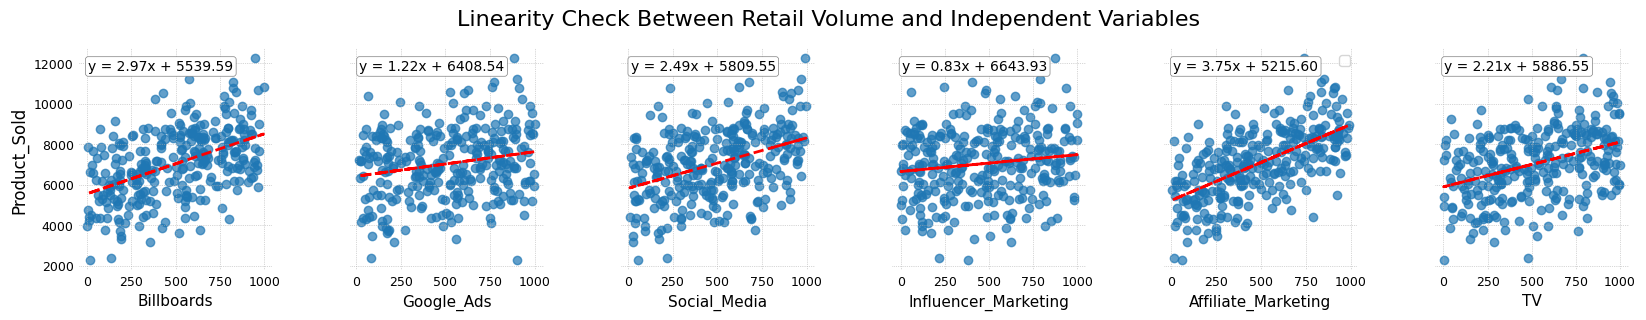

In [69]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, len(df.columns)-1, figsize=(20, 3), sharey=True)
fig.suptitle("Linearity Check Between Retail Volume and Independent Variables", fontsize=16)

axes[0].set_ylabel("Product_Sold", fontsize=12)

for i, col in enumerate(df.columns):
    if col == "Product_Sold":
        continue
    ax = axes[i-1]
    x = df[col]
    y = df["Product_Sold"]
    
    ax.scatter(x, y, alpha=0.7)
    
    # Fit and plot trendline
    coeffs = np.polyfit(x, y, deg=1)
    trend = np.poly1d(coeffs)
    ax.plot(x, trend(x), color='red', linestyle='--', linewidth=2)
    
    # Add linear equation as text
    equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5))
    
    ax.set_xlabel(col, fontsize=11)
    ax.grid(True, linestyle=':', linewidth=0.5)



    # Style adjustments
    ax.tick_params(axis='both', labelsize=9,length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

ax.legend()

plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()

we can see that affiliate marketing cost most effective on production sales, then billboards and then social media and then tv

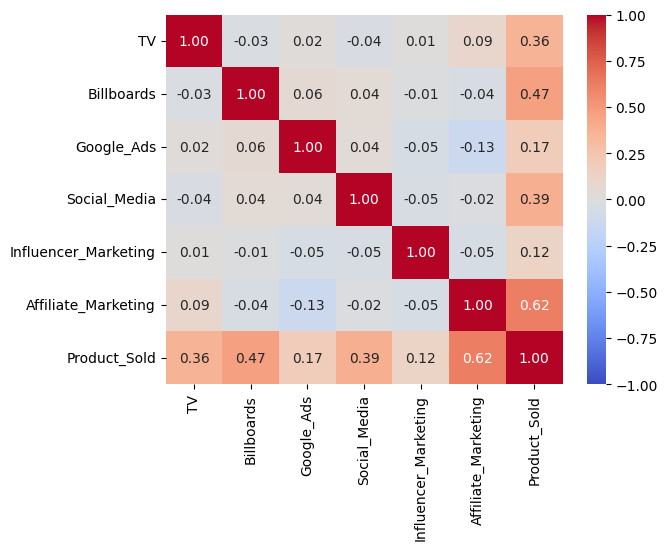

In [70]:
from scipy.stats import spearmanr
import seaborn as sns


# Calculate the correlation and p-values
columns = df.columns
corr_matrix, p_value_matrix = spearmanr(df)
corr_matrix = pd.DataFrame(corr_matrix, index=columns, columns=columns)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

correlation matrix confirms our hypothesis above

In [71]:
df.columns

Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [72]:
df_perc = df.copy()



In [73]:
df_perc['Total_Spend'] = df_perc["TV"]+df_perc["Billboards"]+df_perc["Google_Ads"]+df_perc["Social_Media"]+df_perc["Influencer_Marketing"]+df_perc["Affiliate_Marketing"]
df_perc['TV_perc'] = df_perc["TV"] / df_perc['Total_Spend']
df_perc['Billboards_perc'] = df_perc["Billboards"] / df_perc['Total_Spend']
df_perc['Google_Ads_perc'] = df_perc["Google_Ads"] / df_perc['Total_Spend']
df_perc['Social_Media_perc'] = df_perc["Social_Media"] / df_perc['Total_Spend']
df_perc['Influencer_Marketing_perc'] = df_perc["Influencer_Marketing"] / df_perc['Total_Spend']
df_perc['Affiliate_Marketing_perc'] = df_perc["Affiliate_Marketing"] / df_perc['Total_Spend']
df_perc['Campaign_Effectiveness'] = df_perc["Product_Sold"] / df_perc['Total_Spend']

df_alternete = df_perc.copy()
df_alternete.drop(columns=['TV_perc', 'Billboards_perc', 'Google_Ads_perc', 'Social_Media_perc',
       'Influencer_Marketing_perc', 'Affiliate_Marketing_perc'], inplace=True) 
df_perc.drop(columns=['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing'], inplace=True) 

In [74]:
df_perc

Product_Sold  Total_Spend   TV_perc  Billboards_perc  Google_Ads_perc  \
0          7164.0      2446.33  0.115038         0.220248         0.050664   
1          5055.0      2651.67  0.265105         0.111828         0.210482   
2          6154.0      2660.89  0.117682         0.111218         0.241633   
3          5480.0      2460.68  0.365151         0.024900         0.222999   
4          9669.0      3873.74  0.197876         0.142168         0.168290   
..            ...          ...       ...              ...              ...   
295        6851.0      3121.09  0.246725         0.160636         0.222550   
296        6477.0      3000.11  0.170787         0.083607         0.124589   
297        6949.0      3086.68  0.323357         0.278212         0.253042   
298        7737.0      3170.44  0.101674         0.214866         0.201956   
299        8187.0      3301.82  0.144299         0.267964         0.091401   

     Social_Media_perc  Influencer_Marketing_perc  Affiliate_Marketing_perc  \
0             0.142785                   0.099238                  0.372027   
1             0.068089                   0.294554                  0.049942   
2             0.190053                   0.164949                  0.174464   
3             0.097912                   0.113367                  0.175671   
4             0.172012                   0.102312                  0.217343   
..                 ...                        ...                       ...   
295           0.055192                   0.183353                  0.131544   
296           0.122312                   0.329035                  0.169670   
297           0.019636                   0.056575                  0.069178   
298           0.108392                   0.168500                  0.204612   
299           0.242987                   0.131691                  0.121657   

     Campaign_Effectiveness  
0                  2.928468  
1                  1.906346  
2                  2.312760  
3                  2.227027  
4                  2.496037  
..                      ...  
295                2.195066  
296                2.158921  
297                2.251286  
298                2.440355  
299                2.479542  

[300 rows x 9 columns]

In [56]:
df_perc.describe()

Product_Sold  Total_Spend     TV_perc  Billboards_perc  \
count    300.000000   300.000000  300.000000       300.000000   
mean    7031.523333  2972.483367    0.173262         0.168797   
std     1703.614951   672.237327    0.093616         0.091969   
min     2259.000000  1150.110000    0.000733         0.002014   
25%     5922.500000  2547.990000    0.104773         0.098991   
50%     7051.000000  3032.070000    0.166807         0.167079   
75%     8278.000000  3364.857500    0.238362         0.233881   
max    12227.000000  5225.420000    0.479444         0.523904   

       Google_Ads_perc  Social_Media_perc  Influencer_Marketing_perc  \
count       300.000000         300.000000                 300.000000   
mean          0.172715           0.164768                   0.156827   
std           0.096476           0.089771                   0.095429   
min           0.005131           0.006109                   0.000357   
25%           0.103587           0.096712                   0.076186   
50%           0.170484           0.165140                   0.159484   
75%           0.235963           0.221363                   0.222558   
max           0.634647           0.444785                   0.408448   

       Affiliate_Marketing_perc  Campaign_Effectiveness  
count                300.000000              300.000000  
mean                   0.163632                2.366279  
std                    0.093056                0.238848  
min                    0.002614                1.591708  
25%                    0.092823                2.208384  
50%                    0.154984                2.357953  
75%                    0.228284                2.517427  
max                    0.495439                2.955309

In [59]:
df_perc.sort_values(by='Campaign_Effectiveness', ascending=True).head(10)

Product_Sold  Total_Spend   TV_perc  Billboards_perc  Google_Ads_perc  \
145        2259.0      1419.23  0.000733         0.013867         0.634647   
114        5255.0      2969.20  0.212899         0.112067         0.294918   
118        4481.0      2460.84  0.117159         0.094838         0.380740   
88         4368.0      2372.63  0.106907         0.021655         0.175792   
220        6522.0      3475.35  0.225413         0.053281         0.287050   
223        3947.0      2085.48  0.242654         0.140965         0.069979   
1          5055.0      2651.67  0.265105         0.111828         0.210482   
262        4333.0      2250.81  0.067851         0.032388         0.331792   
253        5729.0      2973.88  0.216179         0.068352         0.258756   
87         6184.0      3190.93  0.151774         0.268771         0.303861   

     Social_Media_perc  Influencer_Marketing_perc  Affiliate_Marketing_perc  \
145           0.039225                   0.267067                  0.044461   
114           0.021376                   0.329964                  0.028775   
118           0.141992                   0.243258                  0.022013   
88            0.290652                   0.373413                  0.031581   
220           0.166406                   0.233513                  0.034336   
223           0.143674                   0.392874                  0.009854   
1             0.068089                   0.294554                  0.049942   
262           0.131415                   0.314660                  0.121894   
253           0.159741                   0.246325                  0.050648   
87            0.015679                   0.252986                  0.006929   

     Campaign_Effectiveness  
145                1.591708  
114                1.769837  
118                1.820923  
88                 1.840995  
220                1.876646  
223                1.892610  
1                  1.906346  
262                1.925085  
253                1.926440  
87                 1.937993

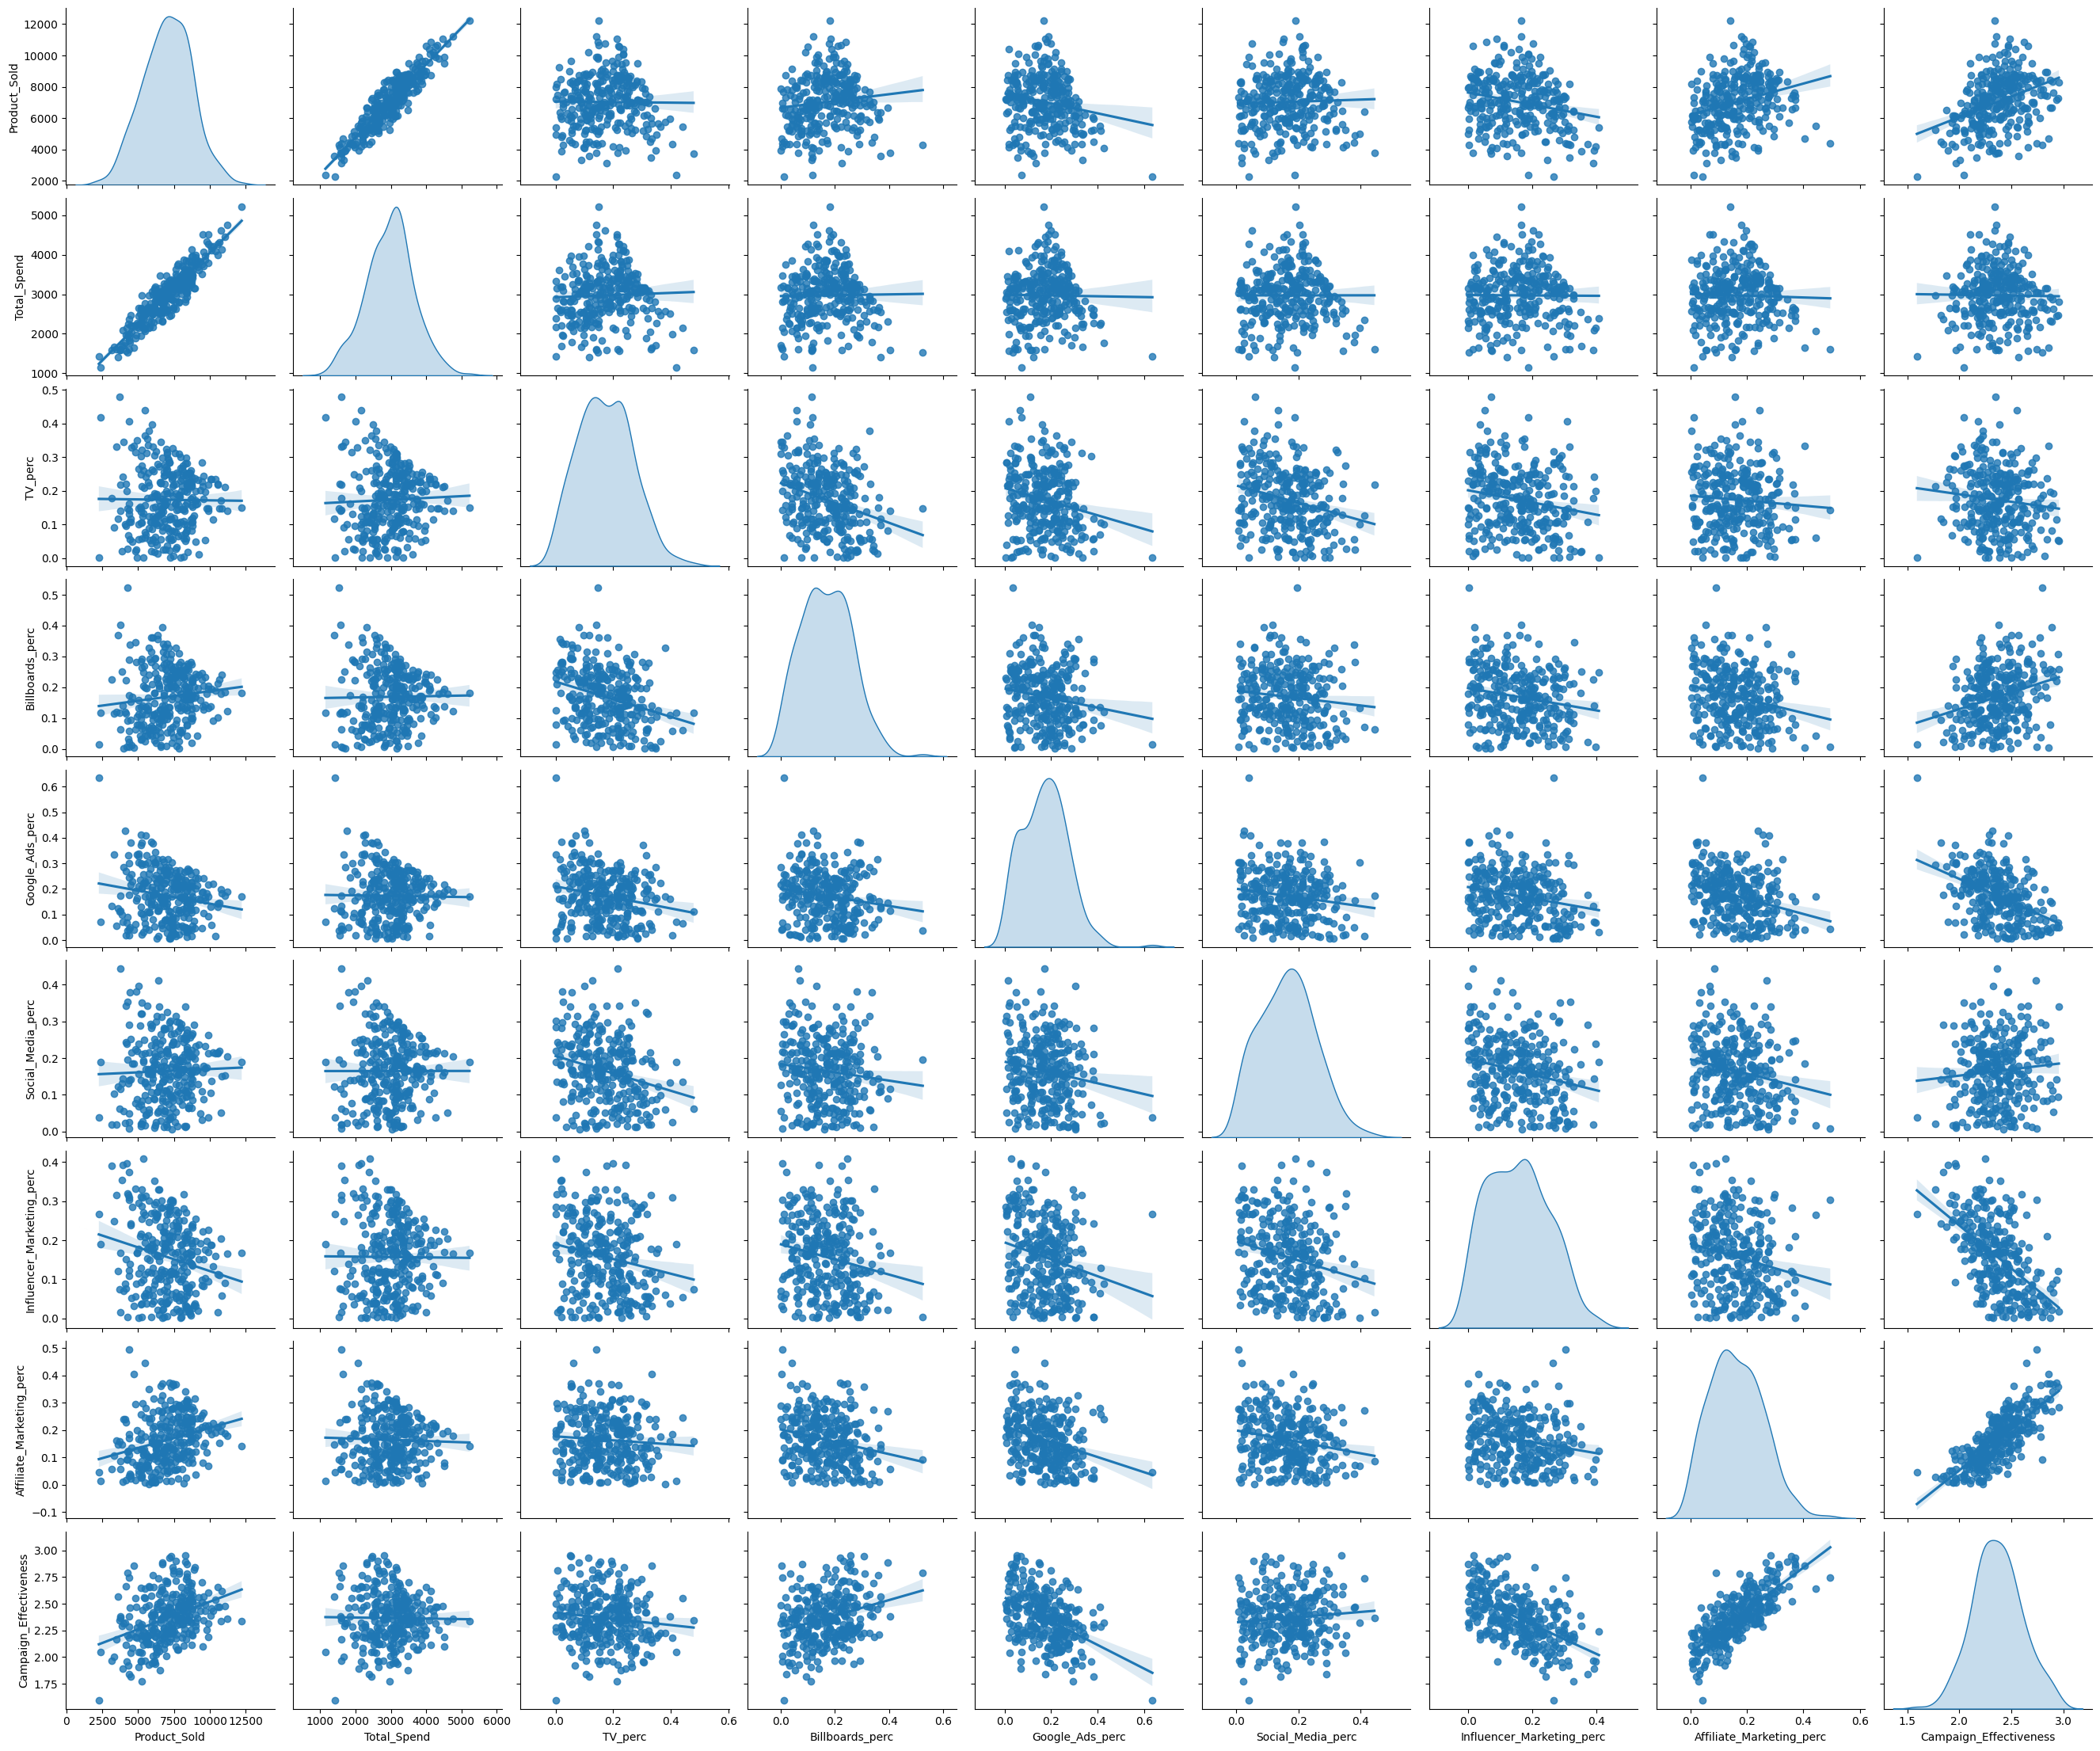

In [60]:
sns.pairplot(df_perc, kind='reg', diag_kind='kde', markers='o', height=2.5, aspect=1.2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


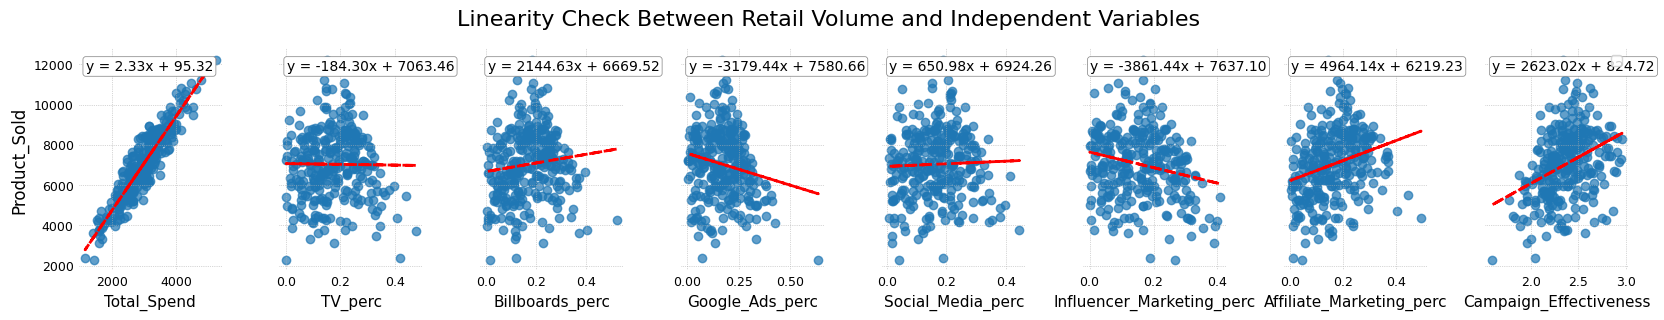

In [61]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, len(df_perc.columns)-1, figsize=(20, 3), sharey=True)
fig.suptitle("Linearity Check Between Retail Volume and Independent Variables", fontsize=16)

axes[0].set_ylabel("Product_Sold", fontsize=12)

for i, col in enumerate(df_perc.columns):
    if col == "Product_Sold":
        continue
    ax = axes[i-1]
    x = df_perc[col]
    y = df_perc["Product_Sold"]
    
    ax.scatter(x, y, alpha=0.7)
    
    # Fit and plot trendline
    coeffs = np.polyfit(x, y, deg=1)
    trend = np.poly1d(coeffs)
    ax.plot(x, trend(x), color='red', linestyle='--', linewidth=2)
    
    # Add linear equation as text
    equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5))
    
    ax.set_xlabel(col, fontsize=11)
    ax.grid(True, linestyle=':', linewidth=0.5)



    # Style adjustments
    ax.tick_params(axis='both', labelsize=9,length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

ax.legend()

plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


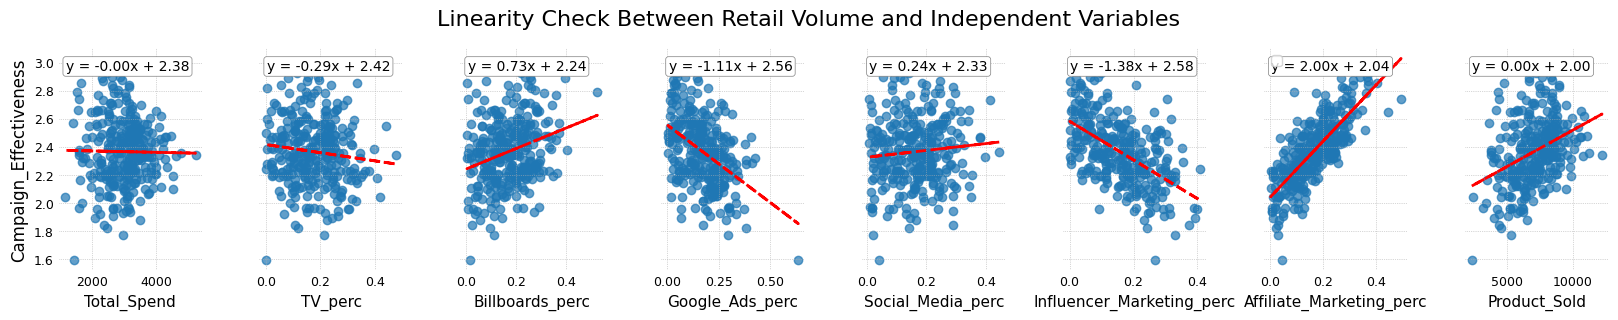

In [62]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, len(df_perc.columns)-1, figsize=(20, 3), sharey=True)
fig.suptitle("Linearity Check Between Retail Volume and Independent Variables", fontsize=16)

axes[0].set_ylabel("Campaign_Effectiveness", fontsize=12)

for i, col in enumerate(df_perc.columns):
    if col == "Campaign_Effectiveness":
        continue
    ax = axes[i-1]
    x = df_perc[col]
    y = df_perc["Campaign_Effectiveness"]
    
    ax.scatter(x, y, alpha=0.7)
    
    # Fit and plot trendline
    coeffs = np.polyfit(x, y, deg=1)
    trend = np.poly1d(coeffs)
    ax.plot(x, trend(x), color='red', linestyle='--', linewidth=2)
    
    # Add linear equation as text
    equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5))
    
    ax.set_xlabel(col, fontsize=11)
    ax.grid(True, linestyle=':', linewidth=0.5)



    # Style adjustments
    ax.tick_params(axis='both', labelsize=9,length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

ax.legend()

plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()

in support of previous insight we can see that if the affiliate marketing cost percentage grows in total marketing expendature then sold products increases, also billboards has simillar effect but on the other hand social media percantage dont effect much of production sales. The others has negative effect on sales. this might indicates that except affiliate marketing and billboards there is a lower limit than the other two which cause to lost their effectiveness.

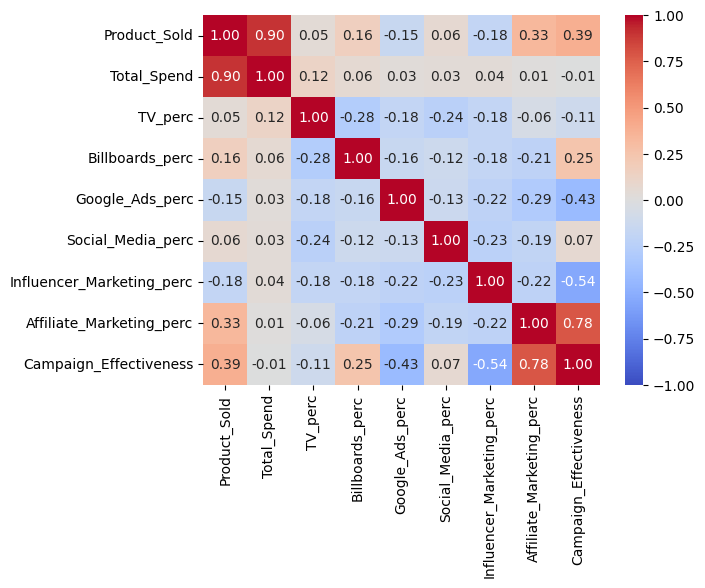

In [63]:

# Calculate the correlation and p-values
columns = df_perc.columns
corr_matrix, p_value_matrix = spearmanr(df_perc)
corr_matrix = pd.DataFrame(corr_matrix, index=columns, columns=columns)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


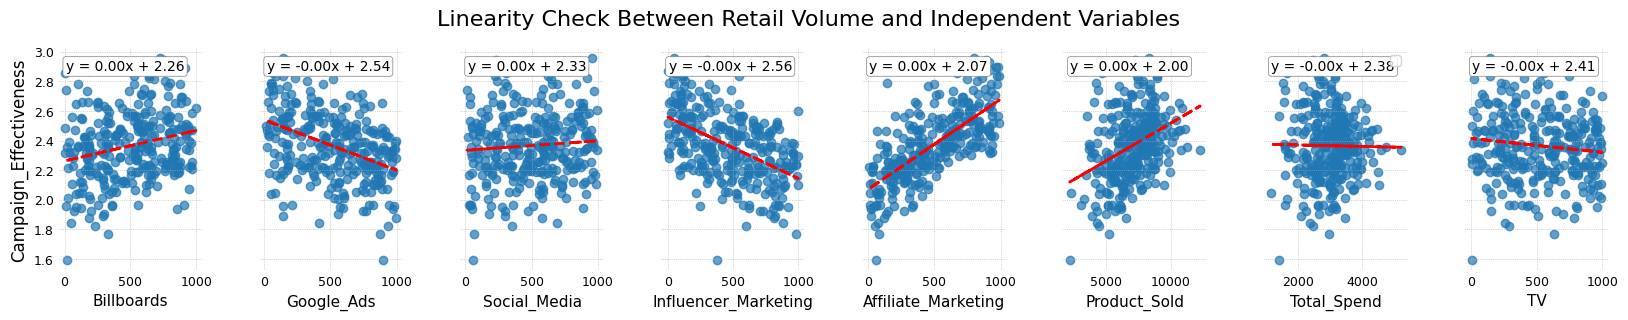

In [75]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, len(df_alternete.columns)-1, figsize=(20, 3), sharey=True)
fig.suptitle("Linearity Check Between Retail Volume and Independent Variables", fontsize=16)

axes[0].set_ylabel("Campaign_Effectiveness", fontsize=12)

for i, col in enumerate(df_alternete.columns):
    if col == "Campaign_Effectiveness":
        continue
    ax = axes[i-1]
    x = df_alternete[col]
    y = df_alternete["Campaign_Effectiveness"]
    
    ax.scatter(x, y, alpha=0.7)
    
    # Fit and plot trendline
    coeffs = np.polyfit(x, y, deg=1)
    trend = np.poly1d(coeffs)
    ax.plot(x, trend(x), color='red', linestyle='--', linewidth=2)
    
    # Add linear equation as text
    equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5))
    
    ax.set_xlabel(col, fontsize=11)
    ax.grid(True, linestyle=':', linewidth=0.5)



    # Style adjustments
    ax.tick_params(axis='both', labelsize=9,length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

ax.legend()

plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()

from the eda we conclde that most effective advertising is affiliate marketing then billboards, and one ca nadd social media to increrase diversity but goodle ads, influencer marketing and tv is not affective about increasing product sales

## Linear Regression Assumpitons

### Assumption 1: Variable Types
we can see that each feature has a float value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


### Assumption 2: Linearity
We can see that connection between the dependent
variable (sales) and each independent variable (ads) is linear.

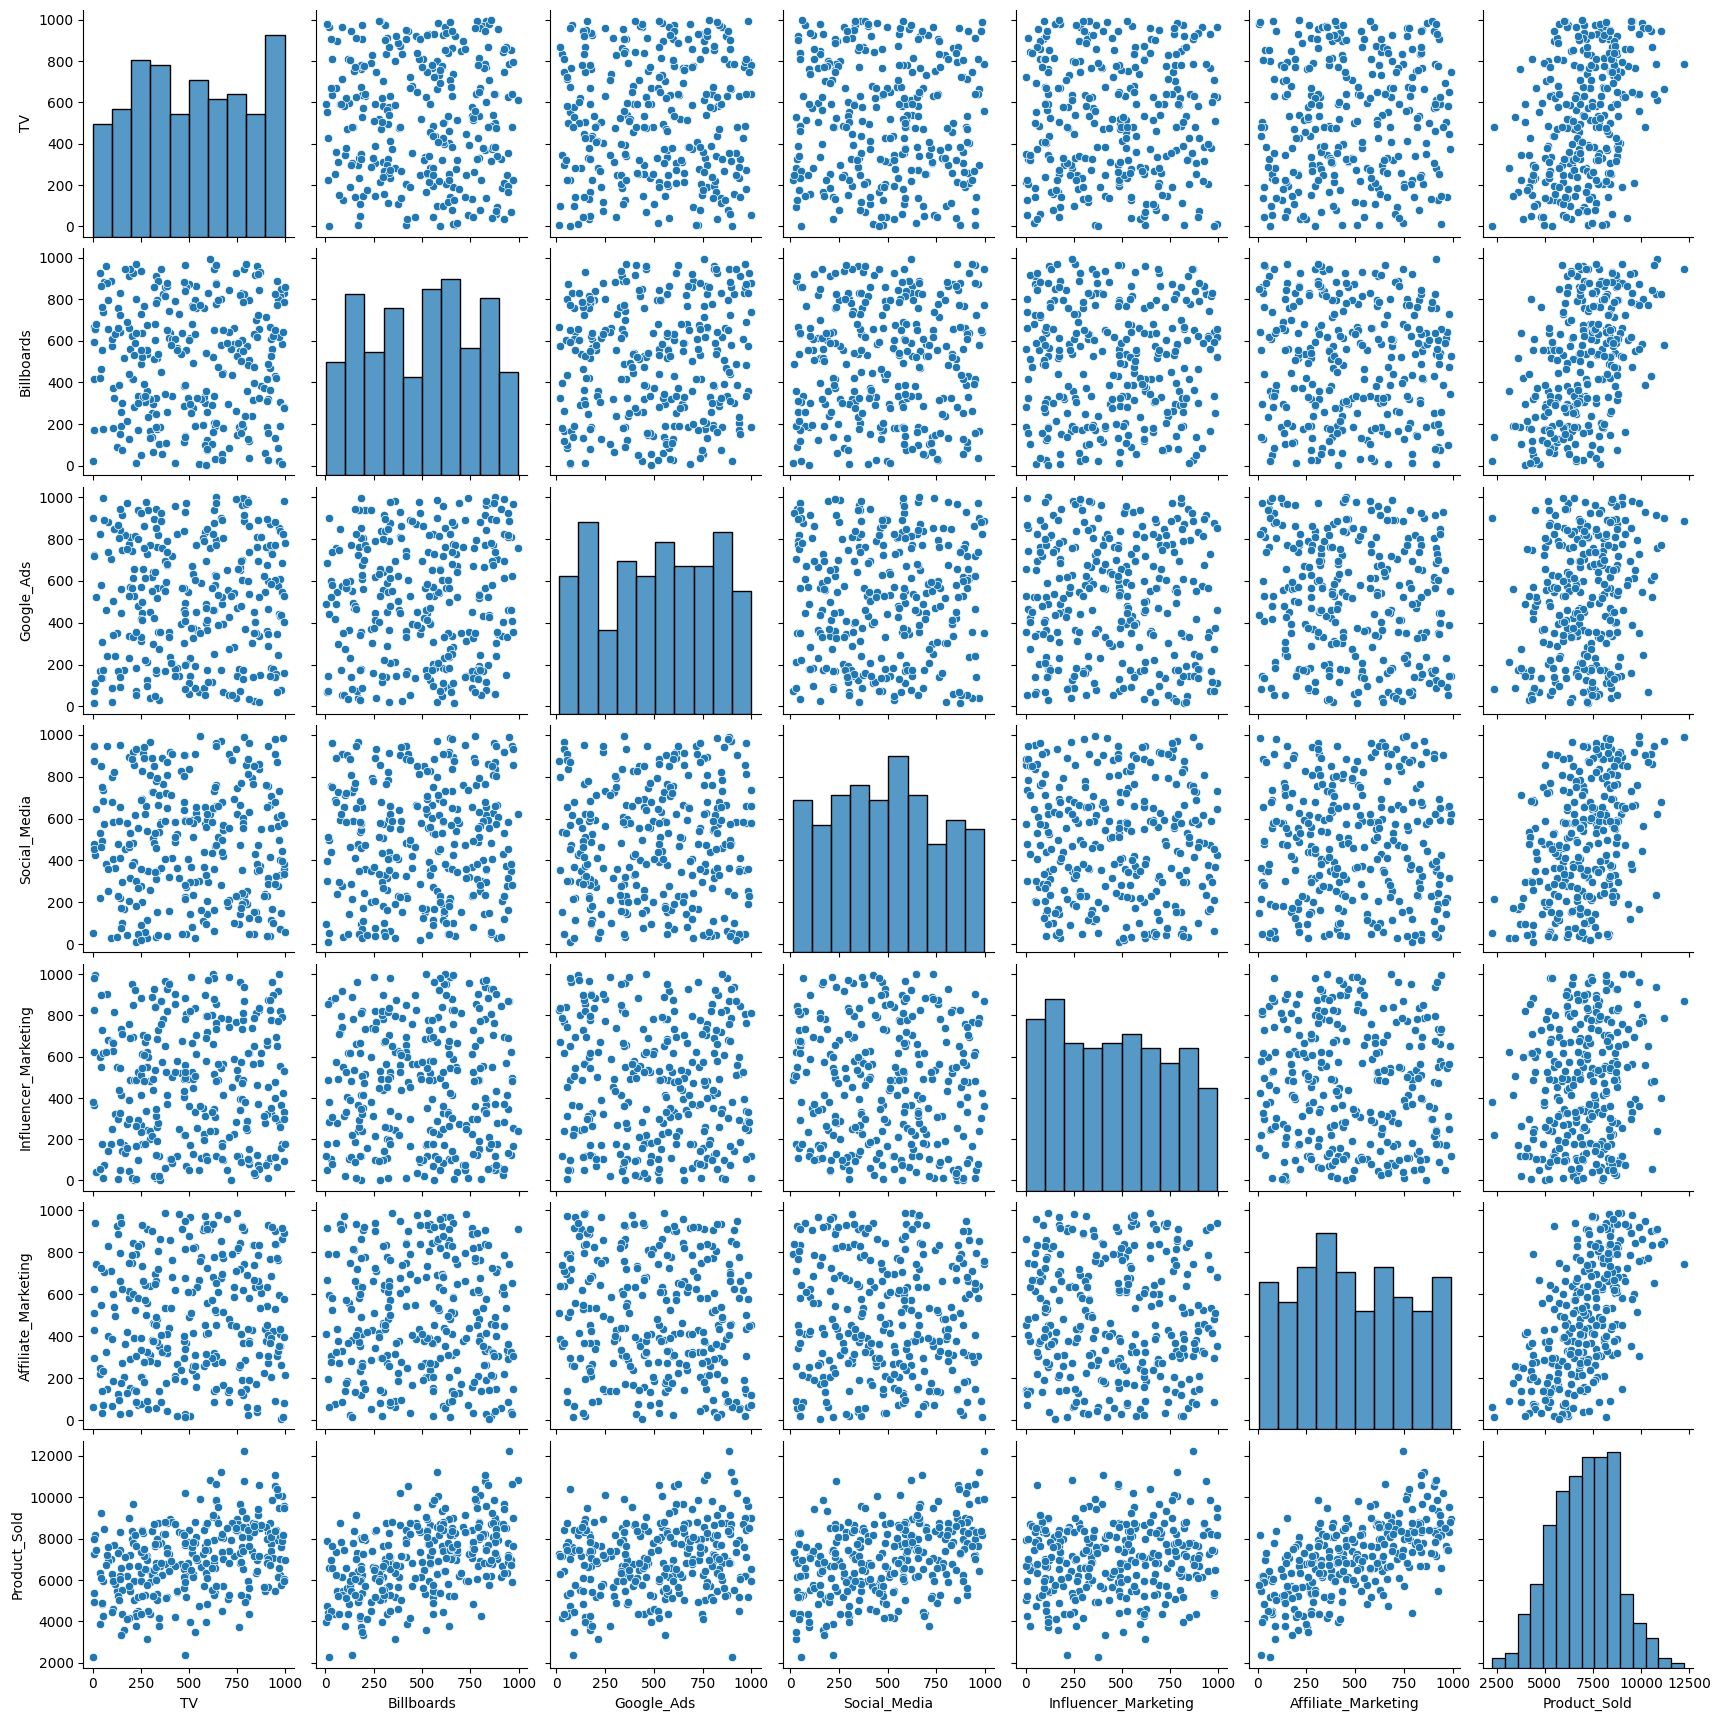

In [7]:
import seaborn as sns

sns.pairplot(df)

### Assumption 3: Normal Distribution of Residuals & Assumption 4: Homoscedasticity

                            OLS Regression Results                            
Dep. Variable:           Product_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.347e+06
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:32:32   Log-Likelihood:                -1123.6
No. Observations:                 300   AIC:                             2261.
Df Residuals:                     293   BIC:                             2287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0887 

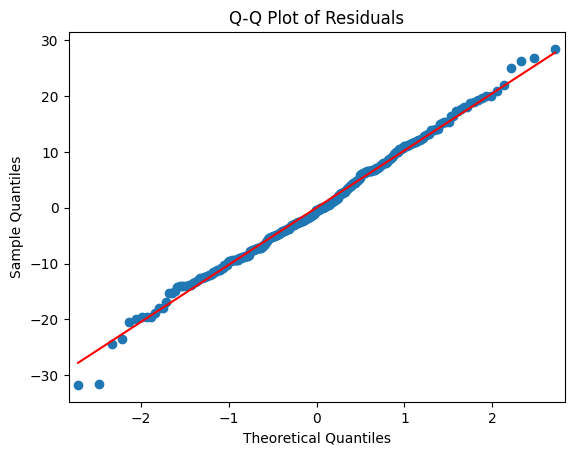

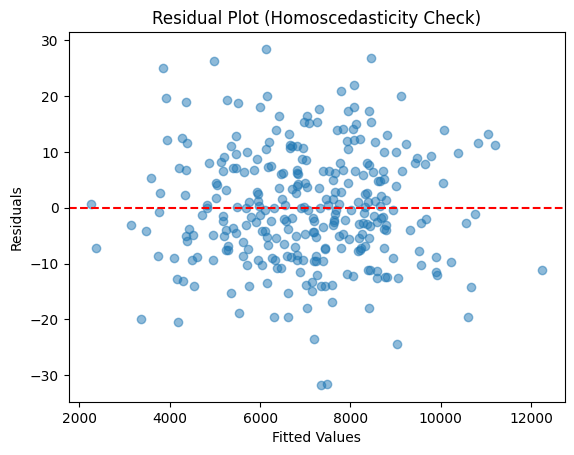

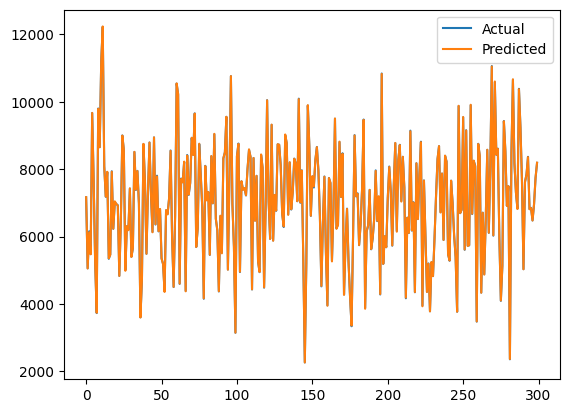

In [8]:
from statsmodels.formula.api import ols
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Step 3: Build formula string
formula = 'Product_Sold ~ TV + Billboards + Google_Ads + Social_Media + Influencer_Marketing + Affiliate_Marketing'

# Step 4: Fit OLS model
model_sm = ols(formula, data=df).fit()
print(model_sm.summary())

# Step 5: Q-Q plot for residuals
sm.qqplot(model_sm.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

plt.scatter(model_sm.fittedvalues, model_sm.resid, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Homoscedasticity Check)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Plot only the part of 'Actual' that matches the length of fitted values
plt.plot(df["Product_Sold"].iloc[-len(model_sm.fittedvalues):], label='Actual')
plt.plot(model_sm.fittedvalues, label='Predicted')
plt.legend()
plt.show()

In [9]:
anova_table = sm.stats.anova_lm(model_sm, typ=2)
anova_table = anova_table[anova_table["PR(>F)"] < 0.05].sort_values(by="sum_sq", ascending=False)
anova_table

sum_sq   df             F  PR(>F)
Affiliate_Marketing   3.583605e+08  1.0  3.338226e+06     0.0
Billboards            2.031039e+08  1.0  1.891969e+06     0.0
Social_Media          1.391994e+08  1.0  1.296681e+06     0.0
TV                    9.825695e+07  1.0  9.152905e+05     0.0
Google_Ads            5.333111e+07  1.0  4.967940e+05     0.0
Influencer_Marketing  3.547687e+07  1.0  3.304768e+05     0.0

### Assumption 5: Multicolinearity

In [10]:
df.columns


Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd


selected_features = [ 'TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing']
X = df[selected_features]
y = df['Product_Sold']

# Add intercept after scaling
X_vif = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif['Variable'] = ['const'] + selected_features
vif['VIF'] = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
vif

Variable        VIF
0                 const  20.714442
1                    TV   1.011536
2            Billboards   1.006814
3            Google_Ads   1.027308
4          Social_Media   1.007057
5  Influencer_Marketing   1.008573
6   Affiliate_Marketing   1.030827

## Building the Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)



LinearRegression()

In [13]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': regr.coef_})
print(coef_df)
print("Intercept:", regr.intercept_)
print("R-squared:", regr.score(X_test, y_test))


                Feature  Coefficient
0                    TV     2.001823
1            Billboards     2.998532
2            Google_Ads     1.498071
3          Social_Media     2.499797
4  Influencer_Marketing     1.199659
5   Affiliate_Marketing     3.996625
Intercept: 1.3474765058326739
R-squared: 0.9999736866138691


if we look at the coefficients

<Axes: ylabel='Product_Sold'>

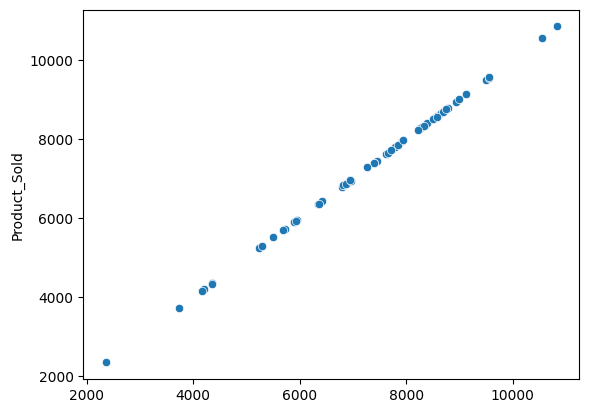

In [35]:
sns.scatterplot(x=regr.predict(X_test), y=y_test)

In [41]:
custom_point = pd.DataFrame([[0, 1500, 0, 0, 0, 1500]], columns=X.columns)
regr.predict(custom_point)


array([10494.08322067])